## Importing Modules

In [55]:
# Import required libraries

# Import visualisation modules
import matplotlib as mpl 
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

#Import modules
import osmnx as ox
import pandas as pd
import geopandas as gpd
import numpy as np
import contextily as ctx

#Import datareading modules
import fiona
import urllib
from urllib.request import urlopen
import csv
import os
import tempfile
import shutil
from pathlib import Path

import warnings 
warnings.simplefilter(action='ignore')
ox.__version__

'1.2.2'

In [175]:
pd.__version__

'1.4.3'

## Data and Pre-processing
Our project topic is about Tourism Development.
References:

Research question:

Scope of Work:

Our data includes:
1. Airbnb listing Data Year of from [Inside Airbnb website]()
2. Airbnb Listing Data Year of from [Inside Airbnb website]()
2. Tourism Attraction Data which is scrapped from [OpenStreetMap]()
3. Greenspace Data from [Ordnance Survey]()
4. Population Data from [Office of National Statistics (ONS) UK Government]()


### Population Density Data

#### Accesssing Population Density Data

In [56]:
# Read the file from github repo URL
url = "https://raw.githubusercontent.com/JinJiang22/fsds_GroupWork/main/data/population_density_2022.csv"
pd_df= pd.read_csv(url, sep=";")

pd_df.head(5)

,Codes,Names,Borough,Population,Hectares,Square Kilometres,Population per hectare,Population per square kilometre,Unnamed: 8,Census population (2011),Population per hectare.1
0,E09000001,City of London,City of London,0,315.1,3.2,0.0,0,NaN,"7,375",23.4
1,E05000026,Abbey,Barking and Dagenham,"8,289",127.9,1.3,64.8,"6,481",NaN,"12,786",100.0
2,E05000027,Alibon,Barking and Dagenham,"17,574",136.1,1.4,129.1,"12,913",NaN,"10,385",76.3
3,E05000028,Becontree,Barking and Dagenham,"11,324",128.4,1.3,88.2,"8,819",NaN,"11,545",89.9
4,E05000029,Chadwell Heath,Barking and Dagenham,"14,751",338.0,3.4,43.6,"4,364",NaN,"10,021",29.6


In [57]:
pd_rename = pd_df.rename(columns = {'Codes':'GSS_CODE'}, inplace = True)
pd_rename = pd_df.rename(columns = {'Population per square kilometre':'pop_density'}, inplace = True)

pd_df.head()

,GSS_CODE,Names,Borough,Population,Hectares,Square Kilometres,Population per hectare,pop_density,Unnamed: 8,Census population (2011),Population per hectare.1
0,E09000001,City of London,City of London,0,315.1,3.2,0.0,0,NaN,"7,375",23.4
1,E05000026,Abbey,Barking and Dagenham,"8,289",127.9,1.3,64.8,"6,481",NaN,"12,786",100.0
2,E05000027,Alibon,Barking and Dagenham,"17,574",136.1,1.4,129.1,"12,913",NaN,"10,385",76.3
3,E05000028,Becontree,Barking and Dagenham,"11,324",128.4,1.3,88.2,"8,819",NaN,"11,545",89.9
4,E05000029,Chadwell Heath,Barking and Dagenham,"14,751",338.0,3.4,43.6,"4,364",NaN,"10,021",29.6


### Tourism Attraction Data

#### Scrapping Tourism Attraction Data
We followed the instruction from this [tutorial]() to scrap tourism attraction Point of Interest(POI)s from OpenStreetMap website. 

The notebook demonstrates the process of gathering local amenity data from OpenStreetMap. Local amenity data of this sort could be used to improve the accuracy of a whole range of ML models. In this notebook, the idea is that that presence of these amenities could help us predict what an AirBnb host might charge.

The notebook covered "How to make basic requests from OpenStreetMap using OSMnx", -author.

In [58]:
# Set up query
query = {'tourism':'attraction'}

# Run query
# Jin: I change ox.pois.pois_from_place to ox.geometries.geometries_from_place, for the adjustment of osmnx version change.
# details: https://stackoverflow.com/questions/71559143/what-happened-to-the-pois-module-in-osmnx-and-what-to-use-now
tourist_attraction = ox.geometries.geometries_from_place(
            'Greater London, UK',
            tags = query,
            which_result=1)

tourist_attraction.head(5)

historic                      name     tourism  \
element_type osmid                                                       
node         25524252   building           Blewcoat School  attraction   
             26559743        NaN                       NaN  attraction   
             252602371       NaN  London Bridge Experience  attraction   
             269236138       NaN      Little Holland House  attraction   
             293221901       NaN    Hall Place and Gardens  attraction   

                        wikidata                        wikipedia  \
element_type osmid                                                  
node         25524252   Q4926413               en:Blewcoat School   
             26559743        NaN                              NaN   
             252602371  Q7748032  en:The London Bridge Experience   
             269236138       NaN                              NaN   
             293221901  Q5642615                              NaN   

                                         geometry access barrier bicycle  \
element_type osmid                                                         
node         25524252   POINT (-0.13606 51.49830)    NaN     NaN     NaN   
             26559743   POINT (-0.14525 51.39520)    NaN     NaN     NaN   
             252602371  POINT (-0.08826 51.50639)    NaN     NaN     NaN   
             269236138  POINT (-0.17065 51.35530)    NaN     NaN     NaN   
             293221901   POINT (0.16023 51.44819)    NaN     NaN     NaN   

                       place  ... int_name source:description name:ban  \
element_type osmid            ...                                        
node         25524252    NaN  ...      NaN                NaN      NaN   
             26559743    NaN  ...      NaN                NaN      NaN   
             252602371   NaN  ...      NaN                NaN      NaN   
             269236138   NaN  ...      NaN                NaN      NaN   
             293221901   NaN  ...      NaN                NaN      NaN   

                       name:eo name:hak name:mai name:pms name:tl name:sw  \
element_type osmid                                                          
node         25524252      NaN      NaN      NaN      NaN     NaN     NaN   
             26559743      NaN      NaN      NaN      NaN     NaN     NaN   
             252602371     NaN      NaN      NaN      NaN     NaN     NaN   
             269236138     NaN      NaN      NaN      NaN     NaN     NaN   
             293221901     NaN      NaN      NaN      NaN     NaN     NaN   

                       name:xmf  
element_type osmid               
node         25524252       NaN  
             26559743       NaN  
             252602371      NaN  
             269236138      NaN  
             293221901      NaN  

[5 rows x 359 columns]

In [59]:
print(f"Data frame is {tourist_attraction.shape[0]:,} x {tourist_attraction.shape[1]}")

Data frame is 344 x 359


#### Tourism Attraction Data Wrangling

In [60]:
# Exploring the data structure and attributes
tourist_attraction.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 344 entries, ('node', 25524252) to ('relation', 12942436)
Columns: 359 entries, historic to name:xmf
dtypes: geometry(1), object(358)
memory usage: 976.9+ KB


In [61]:
# Selecting variables needed
tourism_attraction = tourist_attraction[["name", "tourism", "geometry"]]

# Checking the data
tourism_attraction.head(5)

name     tourism  \
element_type osmid                                             
node         25524252            Blewcoat School  attraction   
             26559743                        NaN  attraction   
             252602371  London Bridge Experience  attraction   
             269236138      Little Holland House  attraction   
             293221901    Hall Place and Gardens  attraction   

                                         geometry  
element_type osmid                                 
node         25524252   POINT (-0.13606 51.49830)  
             26559743   POINT (-0.14525 51.39520)  
             252602371  POINT (-0.08826 51.50639)  
             269236138  POINT (-0.17065 51.35530)  
             293221901   POINT (0.16023 51.44819)

In [62]:
# Identifying NA values in rows of 'name' attribute
tourism_attraction[tourism_attraction.name.isna()]

name     tourism  \
element_type osmid                          
node         26559743     NaN  attraction   
             320446994    NaN  attraction   
             4189248446   NaN  attraction   
             4382359536   NaN  attraction   
             4395971090   NaN  attraction   
             5263136422   NaN  attraction   
             6344035585   NaN  attraction   
             6359405651   NaN  attraction   
             6447075569   NaN  attraction   
             10046275960  NaN  attraction   
way          520139095    NaN  attraction   
             851874002    NaN  attraction   
             851874003    NaN  attraction   

                                                                   geometry  
element_type osmid                                                           
node         26559743                             POINT (-0.14525 51.39520)  
             320446994                            POINT (-0.18974 51.56601)  
             4189248446                           POINT (-0.13182 51.51099)  
             4382359536                           POINT (-0.00712 51.53556)  
             4395971090                           POINT (-0.12517 51.50665)  
             5263136422                           POINT (-0.26097 51.62773)  
             6344035585                           POINT (-0.20505 51.51787)  
             6359405651                           POINT (-0.30643 51.44514)  
             6447075569                           POINT (-0.09701 51.51678)  
             10046275960                          POINT (-0.14002 51.51121)  
way          520139095    POLYGON ((-0.18728 51.56813, -0.18753 51.56847...  
             851874002    LINESTRING (-0.16136 51.47601, -0.16132 51.475...  
             851874003    LINESTRING (-0.16133 51.47567, -0.16124 51.475...

In [63]:
# Counting the NA values
tourism_attraction.isnull().sum(axis=0).sort_values(ascending=False)[:12]

name        13
tourism      0
geometry     0
dtype: int64

We treat NA values as a real tourism attraction, so we decided keep the tourism attraction without a name.

In [64]:
# Keeping the first duplicate row
tourism_df = tourism_attraction.drop_duplicates(['name'])
tourism_df

name     tourism  \
element_type osmid                                             
node         25524252            Blewcoat School  attraction   
             26559743                        NaN  attraction   
             252602371  London Bridge Experience  attraction   
             269236138      Little Holland House  attraction   
             293221901    Hall Place and Gardens  attraction   
...                                          ...         ...   
relation     7220431                    Kew Pond  attraction   
             8048634              Chiswick House  attraction   
             8244923          Little Dean's Yard  attraction   
             8250949           Piccadilly Circus  attraction   
             12942436            Wembley Stadium  attraction   

                                                                 geometry  
element_type osmid                                                         
node         25524252                           POINT (-0.13606 51.49830)  
             26559743                           POINT (-0.14525 51.39520)  
             252602371                          POINT (-0.08826 51.50639)  
             269236138                          POINT (-0.17065 51.35530)  
             293221901                           POINT (0.16023 51.44819)  
...                                                                   ...  
relation     7220431    POLYGON ((-0.28578 51.48458, -0.28557 51.48482...  
             8048634    POLYGON ((-0.25857 51.48363, -0.25861 51.48360...  
             8244923    POLYGON ((-0.12759 51.49840, -0.12763 51.49825...  
             8250949    POLYGON ((-0.13466 51.50974, -0.13472 51.50982...  
             12942436   POLYGON ((-0.28036 51.55725, -0.28025 51.55727...  

[317 rows x 3 columns]

We decided to drop the duplicate tourism attraction and keep the first row of all duplication by 'name attributes.

### Greenspace Data
Greenspace data is downloaded from Ordnance Survey website with selection in 4 tiles that covers all London areas, which are:
1. SP
2. SU
3. TL
4. TQ

Using QGIS, we merged the tiles and we pushed the merged data that is ready to be pre-processed on the [github link](https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/OS_Open_Greenspace/greenspace_merged.gpkg) in GeoPackage format

#### Accessing greenspace data
Since the data is in GeoPackage format, we have to cache our data first.

In [65]:
#Caching the data
import os
from requests import get
from urllib.parse import urlparse

def cache_data(src:str, dest:str) -> str:
    """
    
    cache_data
    
    
    """    
    url = urlparse(src) # We assume that this is some kind of valid URL 
    fn  = os.path.split(url.path)[-1] # Extract the filename
    dfn = os.path.join(dest,fn) # Destination filename
    
    if not os.path.isfile(dfn):
        
        print(f"{dfn} not found, downloading!")

        path = os.path.split(dest)
        
        if len(path) >= 1 and path[0] != '':
            os.makedirs(os.path.join(*path), exist_ok=True)
            
        with open(dfn, "wb") as file:
            response = get(src)
            file.write(response.content)
            
        print("\tDone downloading...")

    else:
        print(f"Found {dfn} locally!")

    return dfn

help(cache_data) # <- This should show the docstring you've written

Help on function cache_data in module __main__:

cache_data(src: str, dest: str) -> str
    cache_data



In [66]:
# Accessing the greenspace_merged.gpkg
ddir  = os.path.join('data') # destination directory
spath = 'https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/OS_Open_Greenspace/' # source path

greenspace_gdf = gpd.read_file( cache_data(spath+'greenspace_merged.gpkg?raw=true', ddir) )

print('Done.')

Found data/greenspace_merged.gpkg locally!
Done.


#### Greenspace Data Wrangling

In [67]:
greenspace_gdf.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 49739 entries, 0 to 49738
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         49739 non-null  object  
 1   function   49739 non-null  object  
 2   distName1  13087 non-null  object  
 3   distName2  46 non-null     object  
 4   distName3  1 non-null      object  
 5   distName4  0 non-null      object  
 6   layer      49739 non-null  object  
 7   path       49739 non-null  object  
 8   geometry   49739 non-null  geometry
dtypes: geometry(1), object(8)
memory usage: 3.4+ MB


In [68]:
# Exploring at the data structure and attributes
greenspace_gdf.head()

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry
0,E56DE74A-4CE2-13A9-E053-AAEFA00A0D0E,Playing Field,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492957.940 289585.690 0.000,..."
1,E56DE74A-4BB9-13A9-E053-AAEFA00A0D0E,Allotments Or Community Growing Spaces,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492218.690 289828.830 0.000,..."
2,E56DE843-A69A-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492475.190 289982.670 0.000,..."
3,E56DE6CA-44B8-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492391.360 289988.480 0.000,..."
4,E56DE848-686E-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((493020.640 290076.310 0.000,..."


In [69]:
# Identifying NA values in rows of function
greenspace_gdf[greenspace_gdf.function.isna()]

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry


As we can see from above, there is no NA values in this data because this data is already selected and cleaned by Ordnance Survey.

In [70]:
# Take a look at the data
greenspace_gdf.head(5)

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry
0,E56DE74A-4CE2-13A9-E053-AAEFA00A0D0E,Playing Field,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492957.940 289585.690 0.000,..."
1,E56DE74A-4BB9-13A9-E053-AAEFA00A0D0E,Allotments Or Community Growing Spaces,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492218.690 289828.830 0.000,..."
2,E56DE843-A69A-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492475.190 289982.670 0.000,..."
3,E56DE6CA-44B8-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((492391.360 289988.480 0.000,..."
4,E56DE848-686E-13A9-E053-AAEFA00A0D0E,Play Space,None,None,None,None,SP_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"MULTIPOLYGON Z (((493020.640 290076.310 0.000,..."


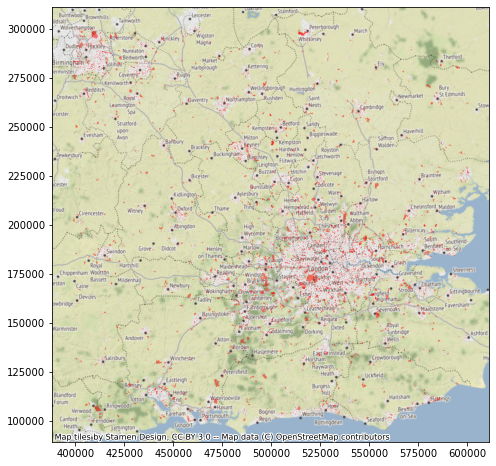

In [71]:
# Plot greenspace geometry
ax = greenspace_gdf.plot(alpha=0.5, color='red', figsize=(12, 8));
# Add background map, expressing target CRS so the basemap can be
# reprojected (warped)
ctx.add_basemap(ax, crs=greenspace_gdf.crs)

### London Ward Data

#### Accessing London Ward Data

In [72]:
ddir  = os.path.join('data') # destination directory
spath = 'https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/' # source path

londonward = gpd.read_file( cache_data(spath+'londonward.gpkg?raw=true', ddir) )

print('Done.')

Found data/londonward.gpkg locally!
Done.


In [73]:
# Take a look at the London Ward data
londonward.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   NAME        657 non-null    object  
 1   GSS_CODE    657 non-null    object  
 2   DISTRICT    657 non-null    object  
 3   LAGSSCODE   657 non-null    object  
 4   HECTARES    657 non-null    float64 
 5   NONLD_AREA  657 non-null    float64 
 6   geometry    657 non-null    geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 36.1+ KB


In [74]:
londonward.head(5)

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"MULTIPOLYGON (((516401.596 160201.802, 516407...."
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"MULTIPOLYGON (((519552.998 164295.600, 519508...."
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"MULTIPOLYGON (((518107.499 167303.399, 518114...."
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"MULTIPOLYGON (((520336.700 165105.498, 520332...."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"MULTIPOLYGON (((521201.203 169275.505, 521204...."


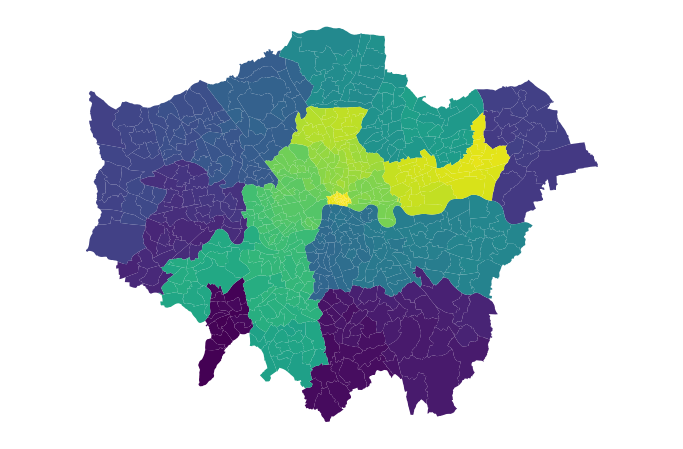

In [75]:
# Plot the London Ward boundary to check
fig, ax = plt.subplots(figsize=(12, 8))

londonward.plot(cmap='viridis',
                       ax=ax,
                    )
 
plt.axis('equal')
ax.set_axis_off()
plt.show()

## Data Processing

### Population Density Data

In [76]:
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt

In [77]:
#we can use all the functions available in pandas, such as .head()
pd_df.head()

,GSS_CODE,Names,Borough,Population,Hectares,Square Kilometres,Population per hectare,pop_density,Unnamed: 8,Census population (2011),Population per hectare.1
0,E09000001,City of London,City of London,0,315.1,3.2,0.0,0,NaN,"7,375",23.4
1,E05000026,Abbey,Barking and Dagenham,"8,289",127.9,1.3,64.8,"6,481",NaN,"12,786",100.0
2,E05000027,Alibon,Barking and Dagenham,"17,574",136.1,1.4,129.1,"12,913",NaN,"10,385",76.3
3,E05000028,Becontree,Barking and Dagenham,"11,324",128.4,1.3,88.2,"8,819",NaN,"11,545",89.9
4,E05000029,Chadwell Heath,Barking and Dagenham,"14,751",338.0,3.4,43.6,"4,364",NaN,"10,021",29.6


In [78]:
## it is important to note that geopandas always has a geometry columns
## here the geoemtries as stored as shapely objects, we should not change
### the name of the geometry column
print(pd_df.columns)

Index(['GSS_CODE', 'Names', 'Borough', 'Population', 'Hectares',
       'Square Kilometres', 'Population per hectare', 'pop_density',
       'Unnamed: 8', 'Census population (2011)', 'Population per hectare.1'],
      dtype='object')


In [152]:
# remove comma in "pop_density"
pd_df = pd_df.replace(',','', regex=True)
pd_df.head()

,GSS_CODE,Names,Borough,Population,Hectares,Square Kilometres,Population per hectare,pop_density,Unnamed: 8,Census population (2011),Population per hectare.1
0,E09000001,City of London,City of London,0,315.1000,3.2,0.0000,0,NaN,7375,23.4000
1,E05000026,Abbey,Barking and Dagenham,8289,127.9000,1.3,64.8000,6481,NaN,12786,100.0000
2,E05000027,Alibon,Barking and Dagenham,17574,136.1000,1.4,129.1000,12913,NaN,10385,76.3000
3,E05000028,Becontree,Barking and Dagenham,11324,128.4000,1.3,88.2000,8819,NaN,11545,89.9000
4,E05000029,Chadwell Heath,Barking and Dagenham,14751,338.0000,3.4,43.6000,4364,NaN,10021,29.6000


In [153]:
# "pop_density"
# transfer object to numeric 
ints  = ['pop_density']
for i in ints:
    print(f"Converting {i}")
    pd_df[i] = pd_df[i].astype('float')

Converting pop_density


In [189]:
londonward_rename = londonward.rename(columns = {'NAME':'Name'},inplace = True)
pd_df_rename = pd_df.rename(columns = {'Names':'Name'},inplace = True)

In [190]:
pd_df.head()

,GSS_CODE,Name,Borough,Population,Hectares,Square Kilometres,Population per hectare,pop_density,Unnamed: 8,Census population (2011),Population per hectare.1
0,E09000001,City of London,City of London,0,315.1000,3.2,0.0000,0.0000,NaN,7375,23.4000
1,E05000026,Abbey,Barking and Dagenham,8289,127.9000,1.3,64.8000,"6,481.0000",NaN,12786,100.0000
2,E05000027,Alibon,Barking and Dagenham,17574,136.1000,1.4,129.1000,"12,913.0000",NaN,10385,76.3000
3,E05000028,Becontree,Barking and Dagenham,11324,128.4000,1.3,88.2000,"8,819.0000",NaN,11545,89.9000
4,E05000029,Chadwell Heath,Barking and Dagenham,14751,338.0000,3.4,43.6000,"4,364.0000",NaN,10021,29.6000


<AxesSubplot:>

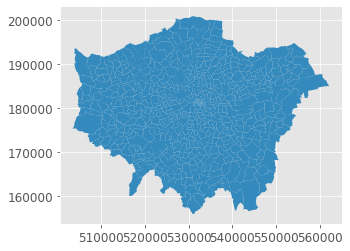

In [191]:
# Join Population data with London Ward boundary by attribute GSS_CODE
pd_gdf = londonward.merge(pd_df, on = 'Name', how = 'left')
pd_gdf.plot()

In [178]:
pd_gdf.to_csv('./gdf_outer.csv')

In [192]:
print(pd_df.shape[0])
print(londonward.shape[0])

626
657


In [193]:
pd_gdf.isna().sum(axis=0).sort_values(ascending=False)[:12]

Unnamed: 8                  694
Borough                      97
Population                   97
Census population (2011)     97
pop_density                  97
Population per hectare       97
Square Kilometres            97
Hectares                     97
Population per hectare.1     97
GSS_CODE_y                   97
GSS_CODE_x                    0
geometry                      0
dtype: int64

In [172]:
londonward.to_csv('./londonward.csv')

In [173]:
pd_df.to_csv('./pd.csv')

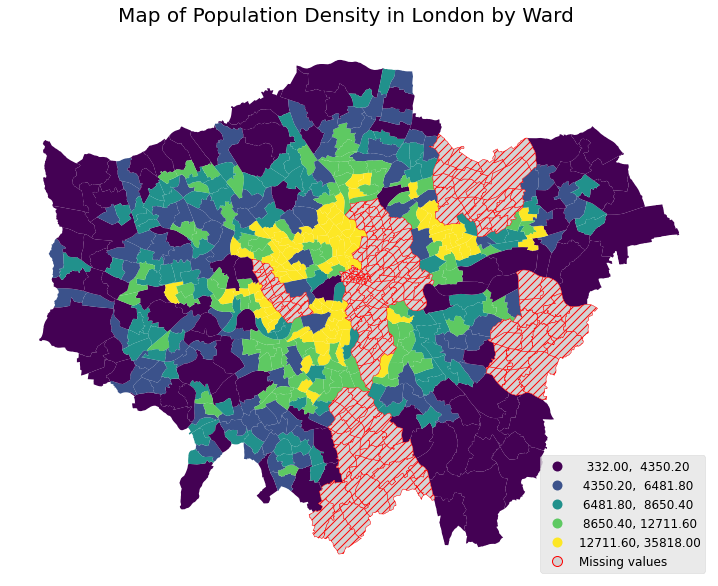

<Figure size 432x288 with 0 Axes>

In [160]:
# plot it
# Set up figure and axis
fig, ax = plt.subplots(1,1, figsize=(15, 10))
fig.suptitle(f"Map of Population Density in London by Ward", fontsize=20, y=0.92)
# Plot the equal interval choropleth and add a legend
pd_gdf.plot(
    column='pop_density', 
    scheme='quantiles', 
    ax=ax,
    legend=True,
    legend_kwds={"loc": 4},
    missing_kwds={
    "color": "lightgrey",
    "edgecolor": "red",
    "hatch": "///",
    "label": "Missing values",}
)
# Remove the axes
ax.set_axis_off()
# Set the title
#ax.set_title("Total Number of Green Space in London by Ward Boundary")
# Add dark basemap
#cx.add_basemap(
#    ax, 
#    crs="EPSG:27700",
#    source=cx.providers.CartoDB.DarkMatterNoLabels
#)
# Draw map
plt.show()

# Save the image
path = 'img'
if not os.path.exists(path):      # And what does *this* do?   #Jin: if the pathway does not exist, then create one.
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

plt.savefig(os.path.join(path,'total_population_density.png'), dpi=300)

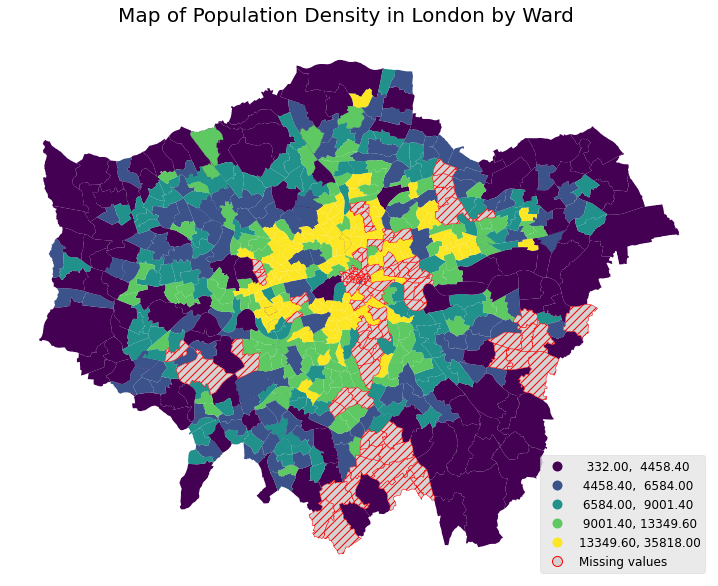

<Figure size 432x288 with 0 Axes>

In [194]:
# plot it
# Set up figure and axis
fig, ax = plt.subplots(1,1, figsize=(15, 10))
fig.suptitle(f"Map of Population Density in London by Ward", fontsize=20, y=0.92)
# Plot the equal interval choropleth and add a legend
pd_gdf.plot(
    column='pop_density', 
    scheme='quantiles', 
    ax=ax,
    legend=True,
    legend_kwds={"loc": 4},
    missing_kwds={
    "color": "lightgrey",
    "edgecolor": "red",
    "hatch": "///",
    "label": "Missing values",}
)
# Remove the axes
ax.set_axis_off()
# Set the title
#ax.set_title("Total Number of Green Space in London by Ward Boundary")
# Add dark basemap
#cx.add_basemap(
#    ax, 
#    crs="EPSG:27700",
#    source=cx.providers.CartoDB.DarkMatterNoLabels
#)
# Draw map
plt.show()

# Save the image
path = 'img'
if not os.path.exists(path):      # And what does *this* do?   #Jin: if the pathway does not exist, then create one.
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

plt.savefig(os.path.join(path,'total_population_density.png'), dpi=300)

### Tourism Attraction Data

#### Clipping the Tourism Attraction Data

In [80]:
# check if they are in the same crs
print("tourism attraction crs:", tourism_df.crs)
print("londonward crs:", londonward.crs)

tourism attraction crs: epsg:4326
londonward crs: epsg:27700


In [81]:
# Transform the data into projected crs EPSG:27700 (British National Grid)
tourism_attract = tourism_df.to_crs(epsg=27700)

In [82]:
tourism_attract.head(5)

name     tourism  \
element_type osmid                                             
node         25524252            Blewcoat School  attraction   
             26559743                        NaN  attraction   
             252602371  London Bridge Experience  attraction   
             269236138      Little Holland House  attraction   
             293221901    Hall Place and Gardens  attraction   

                                             geometry  
element_type osmid                                     
node         25524252   POINT (529481.011 179353.082)  
             26559743   POINT (529134.041 167872.849)  
             252602371  POINT (532775.283 180338.459)  
             269236138  POINT (527477.497 163391.245)  
             293221901  POINT (550210.279 174346.124)

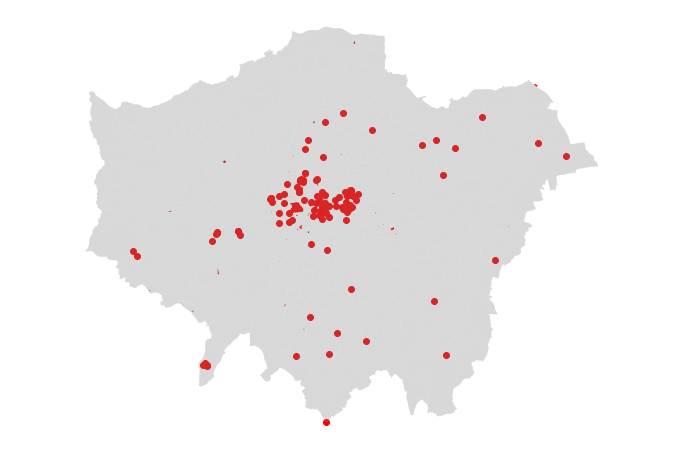

In [83]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

tourism_attract.plot(alpha=1,
                        color="red",
                         ax=ax,
                    )

londonward.plot(color='grey',
                       ax=ax,
                       alpha=.3,
                    )

plt.axis('equal')
ax.set_axis_off()
plt.show()

In [84]:
# Clip the data using GeoPandas clip
tourism_clip = gpd.clip(tourism_attract, londonward)

# View the first 5 rows and a few select columns
tourism_clip.head()

,,name,tourism,geometry
element_type,osmid,,,
node,7574982627,Southernmost Point of Gtr London,attraction,POINT (530898.802 155854.283)
way,825382682,The Brixton Windmill,attraction,"POLYGON ((530457.769 174364.012, 530458.467 17..."
node,5411143721,Thames River Cruises,attraction,POINT (530487.954 179007.805)
way,118720812,"St John's, Smith Square",attraction,"POLYGON ((530109.956 179125.586, 530119.242 17..."
relation,8244923,Little Dean's Yard,attraction,"POLYGON ((530066.731 179362.979, 530028.824 17..."


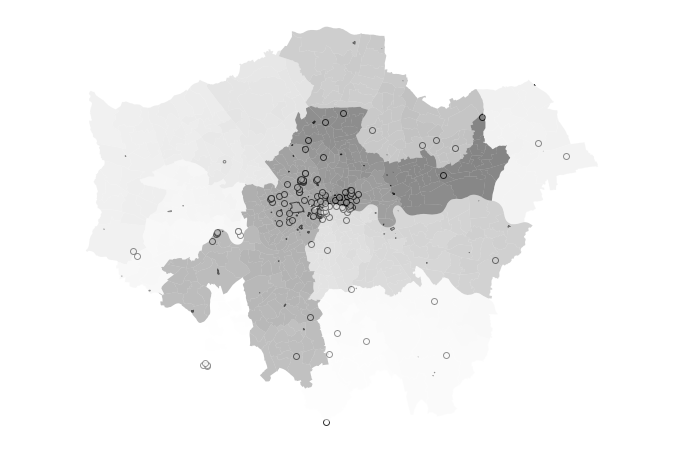

In [85]:
# Plot the clipped data
fig, ax = plt.subplots(figsize=(12, 8))

tourism_clip.plot(alpha=.8,
                         color="white",
                         edgecolor="black",
                         ax=ax)

londonward.plot(cmap="Greys",
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

#### Calculating the Tourism Attraction Centroid

In [86]:
# Calculating centroid of tourism attraction polygon and multipolygon

from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

tourism_centroid = tourism_clip

tourism_clip['geometry'] = tourism_clip['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x)
)

tourism_centroid.head(5)

,,name,tourism,geometry
element_type,osmid,,,
node,7574982627,Southernmost Point of Gtr London,attraction,POINT (530898.802 155854.283)
way,825382682,The Brixton Windmill,attraction,POINT (530460.423 174362.209)
node,5411143721,Thames River Cruises,attraction,POINT (530487.954 179007.805)
way,118720812,"St John's, Smith Square",attraction,POINT (530116.804 179110.967)
relation,8244923,Little Dean's Yard,attraction,POINT (530045.922 179381.813)


In [87]:
tourism_centroid.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 317 entries, ('node', 7574982627) to ('way', 158347149)
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      316 non-null    object  
 1   tourism   317 non-null    object  
 2   geometry  317 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 19.4+ KB


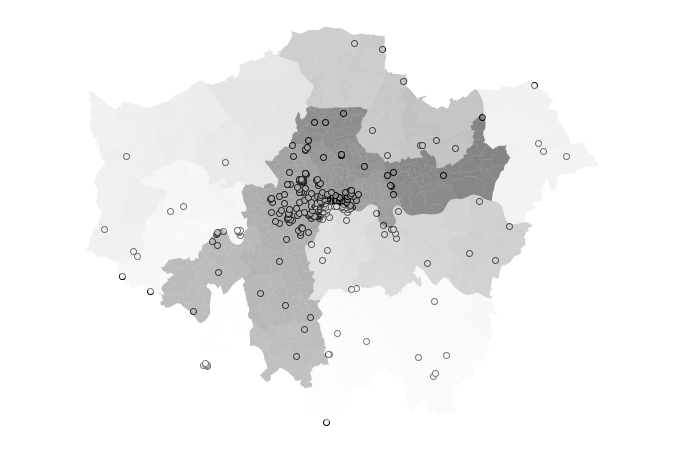

In [88]:
# Plot the greenspace centroid
fig, ax = plt.subplots(figsize=(12, 8))

tourism_centroid.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax,
                        label = 'Greenspace \nLocations'
                    )

londonward.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

In [89]:
# convert geometry into string
from shapely import wkt
ta_centroid = wkt.dumps(tourism_centroid['geometry'][0])
print(ta_centroid)

POINT (530898.8022456206381321 155854.2828139175835531)


In [91]:
# Take a random subset of 1,000 rows from `tokyo`
ta_sub = tourism_centroid.sample(100, random_state=12345)

#### Defining tourism attraction centroid in each ward

First we calculate the points inside the ward area polygon. Since we dont have the same attributes to join, we use spatial join and define every centroids within each ward polygon

Reference: 
https://geopandas.org/en/latest/docs/user_guide/mergingdata.html https://stackoverflow.com/questions/71579502/merging-pandas-file-with-osmnx

In [92]:
tourism_in_ward = tourism_centroid.sjoin(londonward, how="inner", predicate='intersects')

tourism_in_ward.head()

name     tourism  \
element_type osmid                                                      
node         7574982627  Southernmost Point of Gtr London  attraction   
way          825382682               The Brixton Windmill  attraction   
node         5411143721              Thames River Cruises  attraction   
             3747143401                     William Bligh  attraction   
             5018732921              House of Vans London  attraction   

                                              geometry  index_right  \
element_type osmid                                                    
node         7574982627  POINT (530898.802 155854.283)           19   
way          825382682   POINT (530460.423 174362.209)          219   
node         5411143721  POINT (530487.954 179007.805)          229   
             3747143401  POINT (531242.677 179229.974)          229   
             5018732921  POINT (530991.388 179645.912)          229   

                                 NAME   GSS_CODE DISTRICT  LAGSSCODE  \
element_type osmid                                                     
node         7574982627  Old Coulsdon  E05011474  Croydon  E09000008   
way          825382682   Brixton Hill  E05000417  Lambeth  E09000022   
node         5411143721      Bishop's  E05000416  Lambeth  E09000022   
             3747143401      Bishop's  E05000416  Lambeth  E09000022   
             5018732921      Bishop's  E05000416  Lambeth  E09000022   

                         HECTARES  NONLD_AREA  
element_type osmid                             
node         7574982627   693.502       0.000  
way          825382682    113.124       0.000  
node         5411143721   153.959      30.258  
             3747143401   153.959      30.258  
             5018732921   153.959      30.258

#### Counting the number of tourism attraction in each ward

We counted the number of tourism attraction in each London ward to use it as a variable in finding the relationship between tourists' preference and tourism attraction. 

In [93]:
# Counting greenspace centroids by ward
tourism_by_ward = tourism_in_ward.groupby("GSS_CODE").size()

# Checking
tourism_by_ward.head(5)

GSS_CODE
E05000026    1
E05000029    1
E05000102    1
E05000108    1
E05000111    1
dtype: int64

In [94]:
# Assign counts into a table of its own 
# and joins it to the areas table
tourism_count_ward = londonward.join(
    pd.DataFrame({"tourism_attraction_total": tourism_by_ward}),
    on="GSS_CODE"
)

tourism_count_ward.head(5)

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,tourism_attraction_total
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"MULTIPOLYGON (((516401.596 160201.802, 516407....",7.0
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"MULTIPOLYGON (((519552.998 164295.600, 519508....",NaN
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"MULTIPOLYGON (((518107.499 167303.399, 518114....",NaN
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"MULTIPOLYGON (((520336.700 165105.498, 520332....",NaN
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"MULTIPOLYGON (((521201.203 169275.505, 521204....",NaN


In [95]:
# Calculate the total number of green space in London
tourism_london = tourism_count_ward["tourism_attraction_total"].sum()

print("The total of tourism attraction in London are",tourism_london,".")

The total of tourism attraction in London are 318.0 .


In [96]:
# Convert NA values to 0
tourism_count_ward.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   NAME                      657 non-null    object  
 1   GSS_CODE                  657 non-null    object  
 2   DISTRICT                  657 non-null    object  
 3   LAGSSCODE                 657 non-null    object  
 4   HECTARES                  657 non-null    float64 
 5   NONLD_AREA                657 non-null    float64 
 6   geometry                  657 non-null    geometry
 7   tourism_attraction_total  112 non-null    float64 
dtypes: float64(3), geometry(1), object(4)
memory usage: 41.2+ KB


/opt/conda/lib/python3.10/site-packages/mapclassify/classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
/opt/conda/lib/python3.10/site-packages/mapclassify/classifiers.py:241: UserWarning: Warning: setting k to 3
  Warn("Warning: setting k to %d" % k_q, UserWarning)


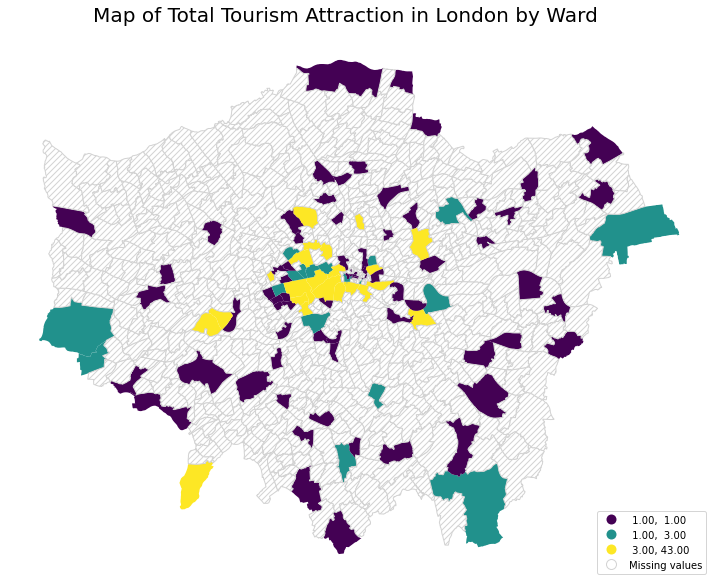

<Figure size 432x288 with 0 Axes>

In [97]:
# Set up figure and axis
fig, ax = plt.subplots(1,1, figsize=(15, 10))
fig.suptitle(f"Map of Total Tourism Attraction in London by Ward", fontsize=20, y=0.92)
# Plot the equal interval choropleth and add a legend
tourism_count_ward.plot(
    column='tourism_attraction_total', 
    scheme='quantiles', 
    ax=ax,
    legend=True,
    legend_kwds={"loc": 4},
    missing_kwds={
    "color": "white",
    "edgecolor": "lightgrey",
    "hatch": "////",
    "label": "Missing values",}
)
# Remove the axes
ax.set_axis_off()
# Set the title
#ax.set_title("Quantile Map of Tourism Attraction Counts by London Ward Boundary", fontsize=20, y=0.92)
# Add london ward basemap
#londonward.plot(color='grey',
#                       ax=ax,
#                       alpha=.2)
# Draw map
plt.show()

# Save the image
path = 'img'
if not os.path.exists(path):      # And what does *this* do?   #Jin: if the pathway does not exist, then create one.
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

plt.savefig(os.path.join(path,'tourism_attraction_ward.png'), dpi=300)

In [ ]:
# Saving the tourism attraction total counts by ward data into local path
path = os.path.join('data')
filenm = 'tourism_attraction.csv'

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
tourism_count_ward.to_csv(os.path.join(path,filenm), index=False)
print("Done.")

After storing the data into local path, we push the data to [github remote repository](https://github.com/JinJiang22/fsds_GroupWork/blob/main/data/tourism_attraction.csv). Then we read the file through the URL to be analysed.

In [99]:
# Read the file from github repo URL
url = "https://raw.githubusercontent.com/JinJiang22/fsds_GroupWork/main/data/tourism_attraction.csv"
ta_df = pd.read_csv(url)

ta_df.head(5)

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,tourism_attraction_total
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,MULTIPOLYGON (((516401.59596424643 160201.8020...,7.0
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,MULTIPOLYGON (((519552.9984840818 164295.60020...,NaN
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,MULTIPOLYGON (((518107.4991065815 167303.39923...,NaN
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,MULTIPOLYGON (((520336.6997870404 165105.49837...,NaN
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,MULTIPOLYGON (((521201.2026888144 169275.50472...,NaN


### Greenspace Data

#### Clipping the Greenspace Data

As mentioned before, the data included four tiles that covered London nearby areas. Now we need to clip our data with London Boundary because our study case location is London.

In [100]:
# check if they are in the same crs
print("greenspace", greenspace_gdf.crs)
print("londonward", londonward.crs)

greenspace epsg:27700
londonward epsg:27700


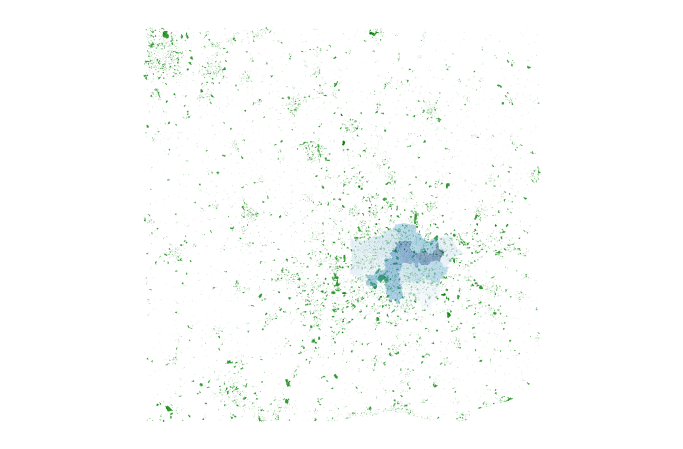

In [101]:
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))

greenspace_gdf.plot(alpha=.8,
                        color="green",
                         ax=ax,
                    )

londonward.plot(cmap='Blues',
                       ax=ax,
                       alpha=.5,
                    )

plt.axis('equal')
ax.set_axis_off()
plt.show()

In [102]:
# Clip the data using GeoPandas clip
greenspace_clip = gpd.clip(greenspace_gdf, londonward)

# View the first 5 rows and a few select columns
greenspace_clip.head()

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry
43299,E56DE6C5-31F0-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((535015.300 159599.140 0.000, 53501..."
43439,E56DE74B-960A-13A9-E053-AAEFA00A0D0E,Religious Grounds,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((534311.880 160595.980 0.000, 53429..."
43443,E56DE6D1-FF13-13A9-E053-AAEFA00A0D0E,Tennis Court,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((534415.150 160731.550 0.000, 53447..."
43446,E56DE74B-9587-13A9-E053-AAEFA00A0D0E,Religious Grounds,Roman Catholic Church of the Holy Family,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((534250.500 160869.900 0.000, 53427..."
43444,E56DE74B-A73D-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,"POLYGON Z ((534961.620 160872.400 0.000, 53472..."


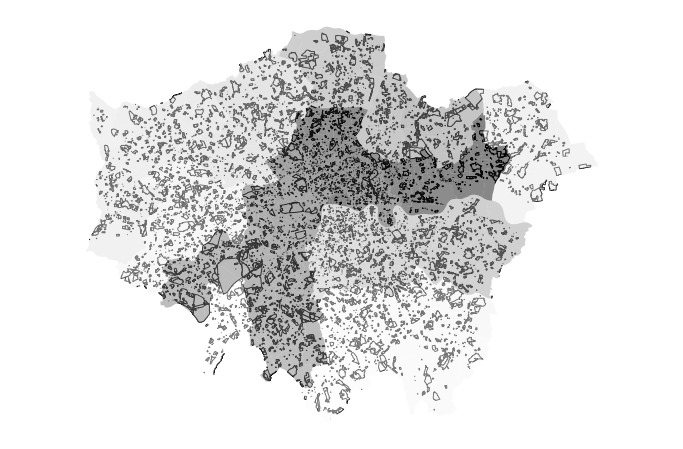

In [103]:
# Plot the clipped data
fig, ax = plt.subplots(figsize=(12, 8))

greenspace_clip.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax)

londonward.plot(cmap="Greys",
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

#### Calculating the Green Space Centroid

In [104]:
# Calculating centroid of greenspace polygon and multipolygon

from shapely.geometry.polygon import Polygon
from shapely.geometry.multipolygon import MultiPolygon

greenspace_centroid = greenspace_clip

greenspace_clip['geometry'] = greenspace_clip['geometry'].apply(
  lambda x: x.centroid if type(x) == Polygon else (
  x.centroid if type(x) == MultiPolygon else x)
)

greenspace_centroid.head(5)

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry
43299,E56DE6C5-31F0-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534996.280 159576.615)
43439,E56DE74B-960A-13A9-E053-AAEFA00A0D0E,Religious Grounds,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534278.211 160594.285)
43443,E56DE6D1-FF13-13A9-E053-AAEFA00A0D0E,Tennis Court,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534507.096 160783.952)
43446,E56DE74B-9587-13A9-E053-AAEFA00A0D0E,Religious Grounds,Roman Catholic Church of the Holy Family,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534239.463 160835.475)
43444,E56DE74B-A73D-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534801.546 160893.843)


In [105]:
greenspace_centroid.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10165 entries, 43299 to 27457
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   id         10165 non-null  object  
 1   function   10165 non-null  object  
 2   distName1  2752 non-null   object  
 3   distName2  10 non-null     object  
 4   distName3  1 non-null      object  
 5   distName4  0 non-null      object  
 6   layer      10165 non-null  object  
 7   path       10165 non-null  object  
 8   geometry   10165 non-null  geometry
dtypes: geometry(1), object(8)
memory usage: 794.1+ KB


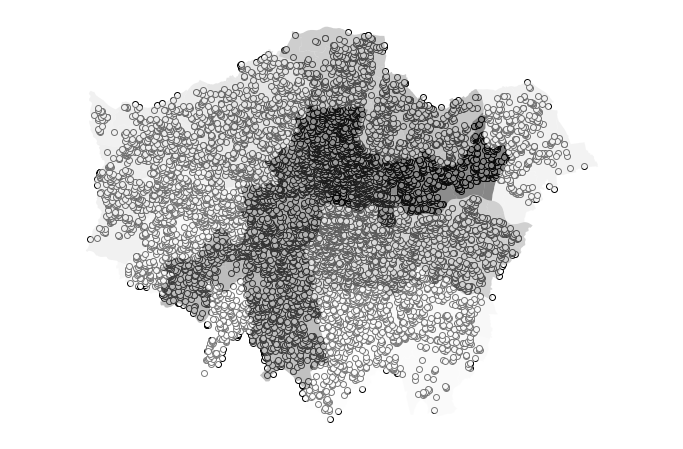

In [106]:
# Plot the greenspace centroid
fig, ax = plt.subplots(figsize=(12, 8))

greenspace_centroid.plot(alpha=1,
                         color="white",
                         edgecolor="black",
                         ax=ax,
                        label = 'Greenspace \nLocations'
                    )

londonward.plot(cmap='Greys',
                       ax=ax,
                       alpha=.5)

ax.set_axis_off()
plt.axis('equal')

plt.show()

#### Defining Green Space Centroid in Each Ward

First we calculate the points inside the ward area polygon. Since we dont have the same attributes to join, we use spatial join and define every centroids within each ward polygon

Reference: 
https://geopandas.org/en/latest/docs/user_guide/mergingdata.html https://stackoverflow.com/questions/71579502/merging-pandas-file-with-osmnx

In [107]:
greenspace_in_ward = greenspace_centroid.sjoin(londonward, how="inner", predicate='intersects')

greenspace_in_ward.head()

,id,function,distName1,distName2,distName3,distName4,layer,path,geometry,index_right,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA
43299,E56DE6C5-31F0-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534996.280 159576.615),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0
43439,E56DE74B-960A-13A9-E053-AAEFA00A0D0E,Religious Grounds,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534278.211 160594.285),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0
43443,E56DE6D1-FF13-13A9-E053-AAEFA00A0D0E,Tennis Court,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534507.096 160783.952),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0
43446,E56DE74B-9587-13A9-E053-AAEFA00A0D0E,Religious Grounds,Roman Catholic Church of the Holy Family,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534239.463 160835.475),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0
43444,E56DE74B-A73D-13A9-E053-AAEFA00A0D0E,Other Sports Facility,None,None,None,None,TQ_GreenspaceSite,/Users/listianingrumr/Documents/CASA/FSDS/fsds...,POINT (534801.546 160893.843),22,Sanderstead,E05011478,Croydon,E09000008,753.708,0.0


In [108]:
greenspace_in_ward.info(verbose=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 10157 entries, 43299 to 30112
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   id           10157 non-null  object  
 1   function     10157 non-null  object  
 2   distName1    2746 non-null   object  
 3   distName2    10 non-null     object  
 4   distName3    1 non-null      object  
 5   distName4    0 non-null      object  
 6   layer        10157 non-null  object  
 7   path         10157 non-null  object  
 8   geometry     10157 non-null  geometry
 9   index_right  10157 non-null  int64   
 10  NAME         10157 non-null  object  
 11  GSS_CODE     10157 non-null  object  
 12  DISTRICT     10157 non-null  object  
 13  LAGSSCODE    10157 non-null  object  
 14  HECTARES     10157 non-null  float64 
 15  NONLD_AREA   10157 non-null  float64 
dtypes: float64(2), geometry(1), int64(1), object(12)
memory usage: 1.3+ MB


#### Counting The Number of Green Spaces in Each Ward

We counted the number of green space in each London ward to use it as a variable in finding the relationship between tourism preference and greenspace. 

In [109]:
# Counting greenspace centroids by ward
greenspace_by_ward = greenspace_in_ward.groupby("GSS_CODE").size()

In [110]:
# Checking
greenspace_by_ward.head(5)

GSS_CODE
E05000026    11
E05000027     7
E05000028     5
E05000029    15
E05000030     6
dtype: int64

In [111]:
# Assign counts into a table of its own 
# and joins it to the areas table
greenspace_count_ward = londonward.join(
    pd.DataFrame({"greenspace_count": greenspace_by_ward}),
    on="GSS_CODE"
)

greenspace_count_ward.head(5)
greenspace_count_ward.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   NAME              657 non-null    object  
 1   GSS_CODE          657 non-null    object  
 2   DISTRICT          657 non-null    object  
 3   LAGSSCODE         657 non-null    object  
 4   HECTARES          657 non-null    float64 
 5   NONLD_AREA        657 non-null    float64 
 6   geometry          657 non-null    geometry
 7   greenspace_count  644 non-null    float64 
dtypes: float64(3), geometry(1), object(4)
memory usage: 41.2+ KB


In [112]:
# Calculate the total number of green space in London
greenspace_london = greenspace_count_ward["greenspace_count"].sum()

print("The total of open green space in London are",greenspace_london,".")

The total of open green space in London are 10157.0 .


In [113]:
greenspace_count_ward.isnull().any()

NAME                False
GSS_CODE            False
DISTRICT            False
LAGSSCODE           False
HECTARES            False
NONLD_AREA          False
geometry            False
greenspace_count     True
dtype: bool

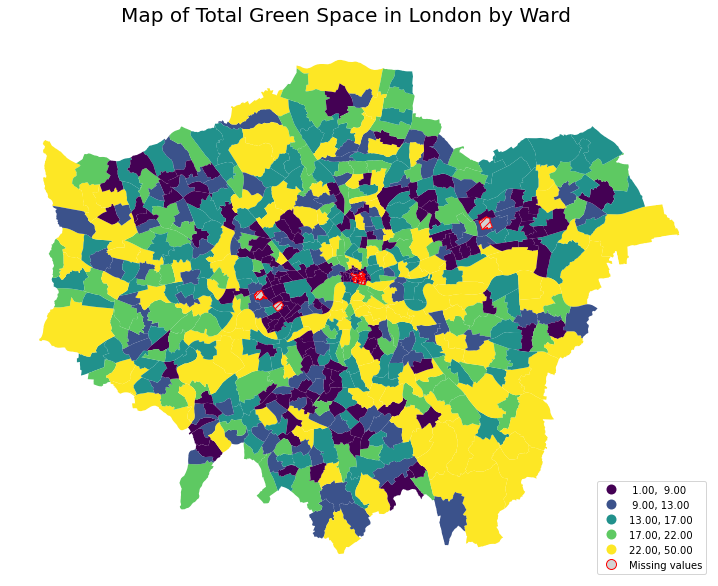

<Figure size 432x288 with 0 Axes>

In [114]:
# Set up figure and axis
fig, ax = plt.subplots(1,1, figsize=(15, 10))
fig.suptitle(f"Map of Total Green Space in London by Ward", fontsize=20, y=0.92)
# Plot the equal interval choropleth and add a legend
greenspace_count_ward.plot(
    column='greenspace_count', 
    scheme='quantiles', 
    ax=ax,
    legend=True,
    legend_kwds={"loc": 4},
    missing_kwds={
    "color": "lightgrey",
    "edgecolor": "red",
    "hatch": "///",
    "label": "Missing values",}
)
# Remove the axes
ax.set_axis_off()
# Set the title
#ax.set_title("Total Number of Green Space in London by Ward Boundary")
# Add dark basemap
#cx.add_basemap(
#    ax, 
#    crs="EPSG:27700",
#    source=cx.providers.CartoDB.DarkMatterNoLabels
#)
# Draw map
plt.show()

# Save the image
path = 'img'
if not os.path.exists(path):      # And what does *this* do?   #Jin: if the pathway does not exist, then create one.
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

plt.savefig(os.path.join(path,'total_greenspace_ward.png'), dpi=300)

In [115]:
# Saving the greenspace total count by ward data into local path
path = os.path.join('data')
filenm = 'greenspace.csv'

if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd('/Users/listianingrumr/Documents/CASA/FSDS/fsds_assess')}")
    os.makedirs(path)
    
greenspace_count_ward.to_csv(os.path.join(path,filenm), index=False)
print("Done.")

Done.


In [116]:
# Read the file from github repo URL
url = "https://raw.githubusercontent.com/JinJiang22/fsds_GroupWork/main/data/greenspace.csv"
gs_df= pd.read_csv(url)

gs_df.head(5)

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,greenspace_count
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,MULTIPOLYGON (((516401.59596424643 160201.8020...,22.0
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,MULTIPOLYGON (((519552.9984840818 164295.60020...,8.0
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,MULTIPOLYGON (((518107.4991065815 167303.39923...,12.0
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,MULTIPOLYGON (((520336.6997870404 165105.49837...,23.0
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,MULTIPOLYGON (((521201.2026888144 169275.50472...,17.0


In [117]:
gs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAME              657 non-null    object 
 1   GSS_CODE          657 non-null    object 
 2   DISTRICT          657 non-null    object 
 3   LAGSSCODE         657 non-null    object 
 4   HECTARES          657 non-null    float64
 5   NONLD_AREA        657 non-null    float64
 6   geometry          657 non-null    object 
 7   greenspace_count  644 non-null    float64
dtypes: float64(3), object(5)
memory usage: 41.2+ KB


## Analysis

Our research question is to identify tourism preferences after COVID19 which will be identified through looking at the relationship between:

- Airbnb Occupancy rate as dependant variable

and as the independent varible we choose 3 factors which are:

- Population Density
- Tourism Attraction
- Open Green Space

In [118]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [119]:
import statsmodels
print(statsmodels.__version__)

0.13.2


In [120]:
# Read the airbnb 2022 file from github repo URL
url = "https://raw.githubusercontent.com/JinJiang22/fsds_GroupWork/main/data/Ward_Airbnb_2022.csv"
abb_df = pd.read_csv(url)
abb_df.head(5)

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry,occupancy_rate_2022
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.1730,0.0000,MULTIPOLYGON (((516401.59596424643 160201.8020...,0.4229
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.4640,0.0000,MULTIPOLYGON (((519552.9984840818 164295.60020...,0.3195
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.3900,0.0000,MULTIPOLYGON (((518107.4991065815 167303.39923...,0.0820
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.5060,0.0000,MULTIPOLYGON (((520336.6997870404 165105.49837...,0.2418
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.8210,0.0000,MULTIPOLYGON (((521201.2026888144 169275.50472...,0.0986


In [136]:
## Merge dependent and independent variables dataframe into one dataframe
dataframe = pd.merge(pd.merge(abb_df,gs_df,on='GSS_CODE'),pd_df,on='GSS_CODE')
dataframe.head()

,NAME_x,GSS_CODE,DISTRICT_x,LAGSSCODE_x,HECTARES_x,NONLD_AREA_x,geometry_x,occupancy_rate_2022,NAME_y,DISTRICT_y,...,Names,Borough,Population,Hectares,Square Kilometres,Population per hectare,pop_density,Unnamed: 8,Census population (2011),Population per hectare.1
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.1730,0.0000,MULTIPOLYGON (((516401.59596424643 160201.8020...,0.4229,Chessington South,Kingston upon Thames,...,Chessington South,Kingston upon Thames,"9,410",755.2000,7.6,12.5000,"1,246",NaN,"10,232",13.5000
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.4640,0.0000,MULTIPOLYGON (((519552.9984840818 164295.60020...,0.3195,Tolworth and Hook Rise,Kingston upon Thames,...,Tolworth and Hook Rise,Kingston upon Thames,"11,736",259.5000,2.6,45.2000,"4,523",NaN,"9,833",37.9000
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.3900,0.0000,MULTIPOLYGON (((518107.4991065815 167303.39923...,0.0820,Berrylands,Kingston upon Thames,...,Berrylands,Kingston upon Thames,"11,224",145.2000,1.5,77.3000,"7,730",NaN,"9,437",65.0000
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.5060,0.0000,MULTIPOLYGON (((520336.6997870404 165105.49837...,0.2418,Alexandra,Kingston upon Thames,...,Alexandra,Kingston upon Thames,"8,012",267.7000,2.7,29.9000,"2,993",NaN,"9,246",34.5000
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.8210,0.0000,MULTIPOLYGON (((521201.2026888144 169275.50472...,0.0986,Beverley,Kingston upon Thames,...,Beverley,Kingston upon Thames,"11,145",188.0000,1.9,59.3000,"5,928",NaN,"10,109",53.8000


In [171]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 0 to 482
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NAME_x                    483 non-null    object 
 1   GSS_CODE                  483 non-null    object 
 2   DISTRICT_x                483 non-null    object 
 3   LAGSSCODE_x               483 non-null    object 
 4   HECTARES_x                483 non-null    float64
 5   NONLD_AREA_x              483 non-null    float64
 6   geometry_x                483 non-null    object 
 7   occupancy_rate_2022       483 non-null    float64
 8   NAME_y                    483 non-null    object 
 9   DISTRICT_y                483 non-null    object 
 10  LAGSSCODE_y               483 non-null    object 
 11  HECTARES_y                483 non-null    float64
 12  NONLD_AREA_y              483 non-null    float64
 13  geometry_y                483 non-null    object 
 14  greenspace

### new part for pop_density

In [139]:
# Selecting attributes
# Selecting variables needed
df = dataframe[["occupancy_rate_2022", "greenspace_count", "pop_density"]]

#df = df.apply(pd.to_numeric)

# Checking the data
df.head(5)
df.info()

ValueError: Unable to parse string "Chessington South" at position 0

In [140]:
df

,occupancy_rate_2022,greenspace_count,pop_density
0,0.4229,22.0000,"1,246.0000"
1,0.3195,8.0000,"4,523.0000"
2,0.0820,12.0000,"7,730.0000"
3,0.2418,23.0000,"2,993.0000"
4,0.0986,17.0000,"5,928.0000"
...,...,...,...
478,0.1798,17.0000,"6,232.0000"
479,0.0536,4.0000,"7,106.0000"
480,0.0922,6.0000,"3,254.0000"
481,0.0871,15.0000,"4,364.0000"


AttributeError: 'Line2D' object has no property 'legend_kwds'

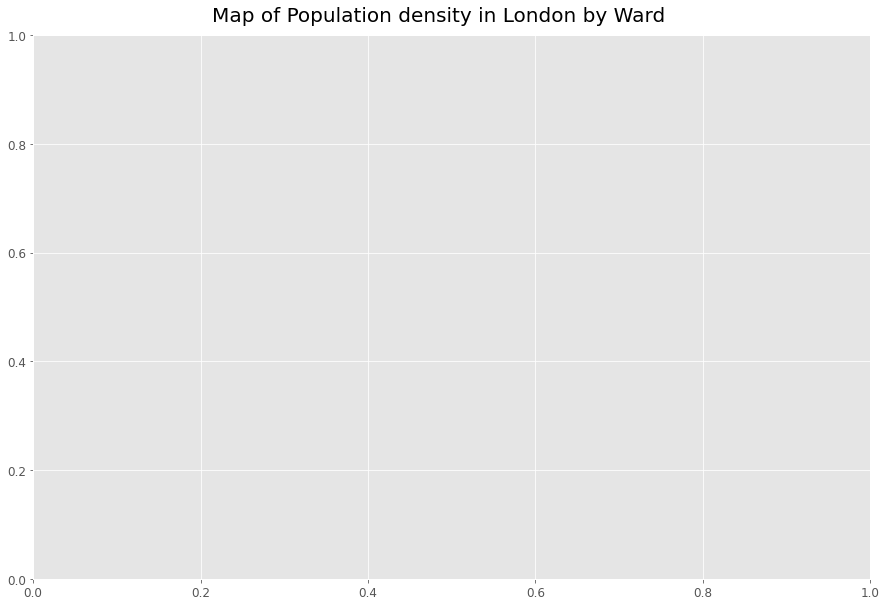

In [143]:
# Set up figure and axis
fig, ax = plt.subplots(1,1, figsize=(15, 10))
fig.suptitle(f"Map of Population density in London by Ward", fontsize=20, y=0.92)
# Plot the equal interval choropleth and add a legend
df.plot(
    column='pop_density', 
    scheme='quantiles', 
    ax=ax,
    legend=True,
    legend_kwds={"loc": 4},
    missing_kwds={
    "color": "white",
    "edgecolor": "lightgrey",
    "hatch": "////",
    "label": "Missing values",}
)
# Remove the axes
ax.set_axis_off()
# Set the title
#ax.set_title("Quantile Map of Tourism Attraction Counts by London Ward Boundary", fontsize=20, y=0.92)
# Add london ward basemap
#londonward.plot(color='grey',
#                       ax=ax,
#                       alpha=.2)
# Draw map
plt.show()

# Save the image
path = 'img'
if not os.path.exists(path):      # And what does *this* do?   #Jin: if the pathway does not exist, then create one.
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)

plt.savefig(os.path.join(path,'Population density.png'), dpi=300)

KeyError: 'population_density'

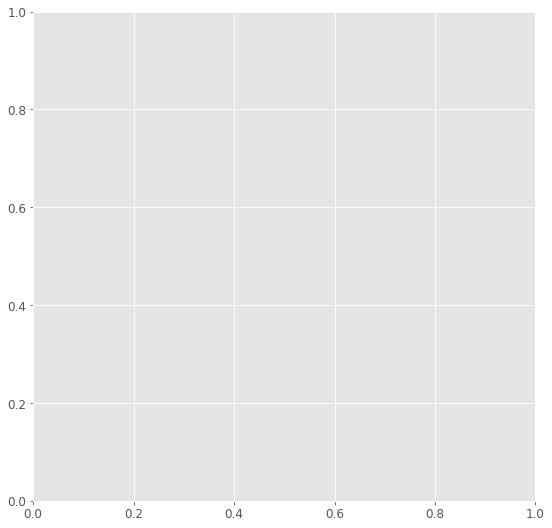

In [141]:
# plot the result
df.plot(kind='scatter', x='population_density', y='occupancy_rate_2022', figsize=(9, 9))

In [ ]:
# plot the result
df.plot(kind='scatter', x='tourism_attraction_total', y='occupancy_rate_2022', figsize=(9, 9))

In [ ]:
df.plot(kind='scatter', x='greenspace_count', y='occupancy_rate_2022', figsize=(9, 9))

In [ ]:
# Heatmap/correlation between variables

plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [ ]:
# build the model, using this equation to formalute the regression model
# ''
# the left-hand side is the y variable and right-hand side is the x variables

df_cnt = sm.formula.ols('occupancy_rate_2022 ~ population_density + greenspace_count',df).fit()
df_cnt.summary()

In [ ]:
# plot 
plt.scatter(df.fittedvalues, df.resid)
# adding title and labels
plt.xlabel('try')
plt.ylabel('Residual')
plt.title('Residual vs. try')
plt.show()